# Efeito da Sazonalidade:

Aqui, irei fazer uma análise EDA para encontrar períodos de tempo em que a receita aumenta.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_excel("../data/online_retail_cleaned.xlsx")

# Criando Receita:

In [31]:
df["revenue"] = df["quantity_cleaned"] * df["unit_price_cleaned"]

In [32]:
df.head()

,invoice_no,stock_code_cleaned,description_cleaned,quantity_cleaned,invoice_date,unit_price_cleaned,customer_id,country_cleaned,revenue
0,536620,21058,party invites woodland,12,2010-12-02 10:27:00,0.85,14135,united kingdom,10.2
1,536620,21060,party invites balloon girl,12,2010-12-02 10:27:00,0.85,14135,united kingdom,10.2
2,536620,21061,party invites football,12,2010-12-02 10:27:00,0.85,14135,united kingdom,10.2
3,536620,21062,party invites spaceman,12,2010-12-02 10:27:00,0.85,14135,united kingdom,10.2
4,536620,21719,lovely bonbon sticker sheet,12,2010-12-02 10:27:00,0.85,14135,united kingdom,10.2


# Análise Mensal:

Em quais meses ocorrem maior receita?

In [38]:
df["invoice_date"] = pd.to_datetime(df["invoice_date"])

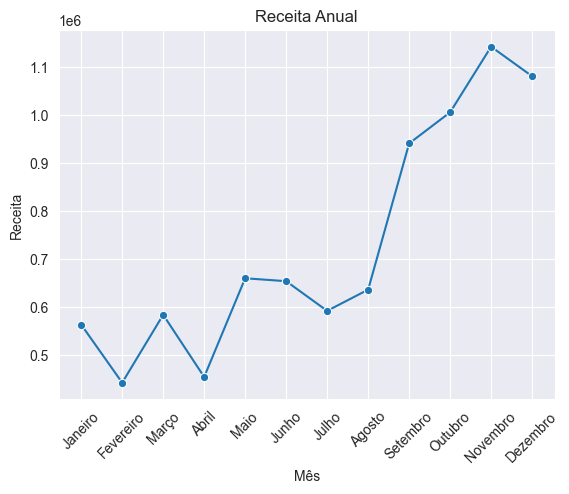

In [34]:
meses = {
    1: "Janeiro", 2: "Fevereiro", 3: "Março", 4: "Abril",
    5: "Maio", 6: "Junho", 7: "Julho", 8: "Agosto",
    9: "Setembro", 10: "Outubro", 11: "Novembro", 12: "Dezembro"
}

df["month_n"] = df["invoice_date"].dt.month
df["month"] = df["invoice_date"].dt.month.map(meses)

plot_df = (
    df.groupby(["month_n","month"], as_index=False)
        .agg(revenue=("revenue", "sum"))
        .sort_values("month_n")
)

sns.lineplot(
    data=plot_df,
    x="month",
    y="revenue",
    marker="o"
)
plt.xticks(rotation=45)
plt.xlabel("Mês")
plt.ylabel("Receita")
plt.title("Receita Anual")
plt.grid(True)
plt.show()


# Receita diária para cada mês com receita alta:

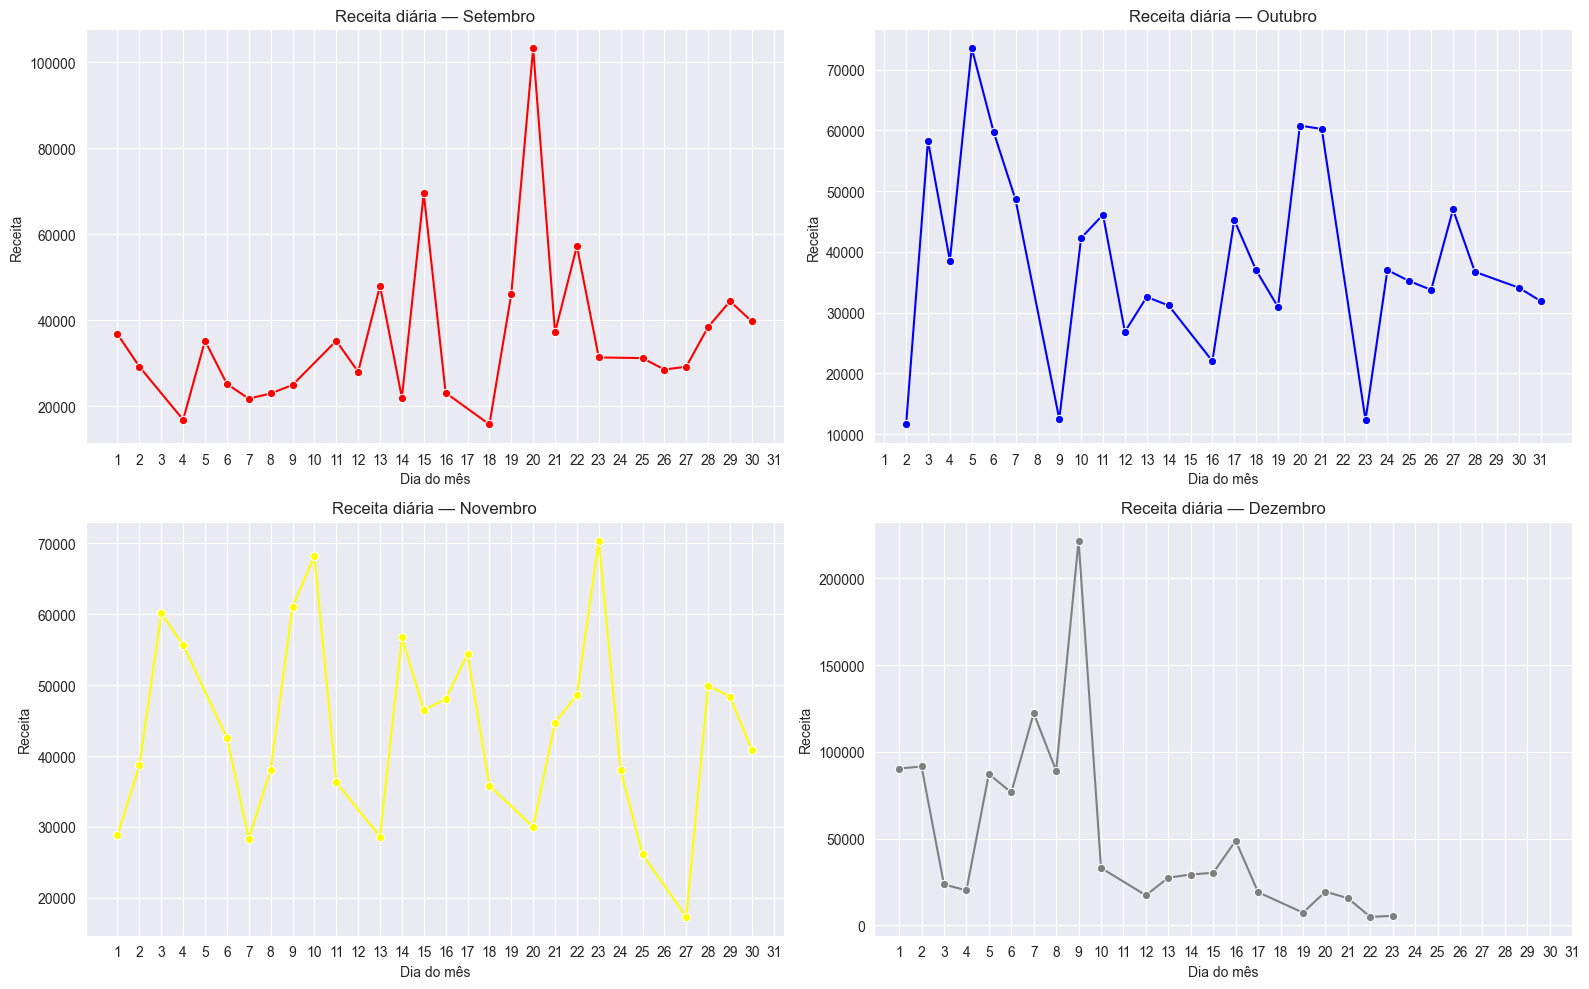

In [39]:
df["day"] = df["invoice_date"].dt.day

# Atribui cor para cada mês
months_colors = {
    "Setembro": "red",
    "Outubro": "blue",
    "Novembro": "yellow",
    "Dezembro": "gray"
}

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()  # transforma em lista 1D

for ax, (month, color) in zip(axes, months_colors.items()):

    df_month = df[df["month"] == month]

    plot_df = (
        df_month
        .groupby("day", as_index=False)
        .agg(revenue=("revenue", "sum"))
        .sort_values("day")
    )

    sns.lineplot(
        data=plot_df,
        x="day",
        y="revenue",
        marker="o",
        color=color,
        ax=ax
    )

    ax.set_title(f"Receita diária — {month}")
    ax.set_xlabel("Dia do mês")
    ax.set_ylabel("Receita")
    ax.set_xticks(range(1, 32))
    ax.grid(True)

plt.tight_layout()
plt.show()


# Pedidos por país:

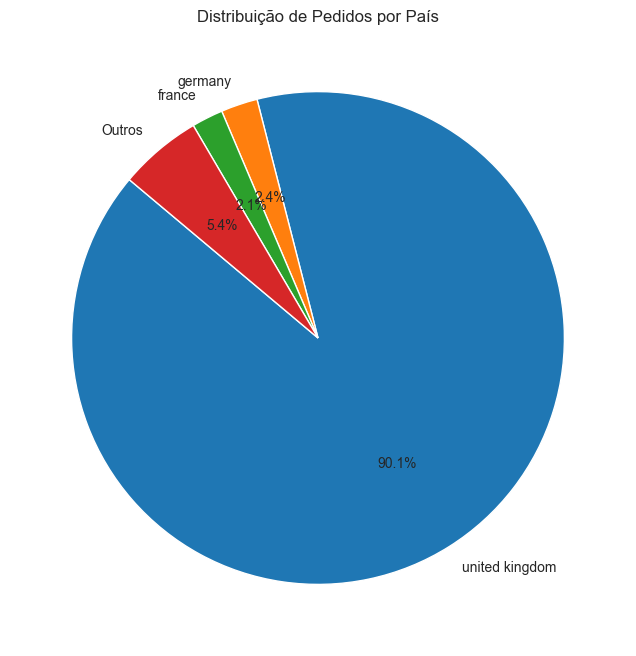

In [49]:
orders_by_country = (
    df.groupby("country_cleaned")["invoice_no"]
      .nunique()
      .sort_values(ascending=False)
)

# Cria porcentagem de pedidos por páis
percentages = orders_by_country / orders_by_country.sum() * 100

# Filtra países apenas com porcentagem maior que 2%
top = percentages[percentages > 2]

# Páises com porcentagem menor que 2% são classificados como 'outros'
others = 100 - top.sum()

plot_data = pd.concat(
    [top, pd.Series({"Outros": others})]
)

plt.figure(figsize=(8, 8))
plt.pie(
    plot_data,
    labels=plot_data.index,
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Distribuição de Pedidos por País")
plt.show()

Observando os três últimos gráficos e fazendo uma pesquisa preliminar sobre datas relevantes no país com mais vendas (Reino Unido), tenho as seguintes conclusões que justificam os picos de receita no primeiro gráfico:

- Setembro -> Ínicio do período letivo nas escolas do Reino Unido.
- Outubro -> Halloween.
- Novembro -> Black Friday.
- Dezembro -> Natal.

# Análise por dia da semana:

In [36]:
df["week_n"] = df["invoice_date"].dt.dayofweek

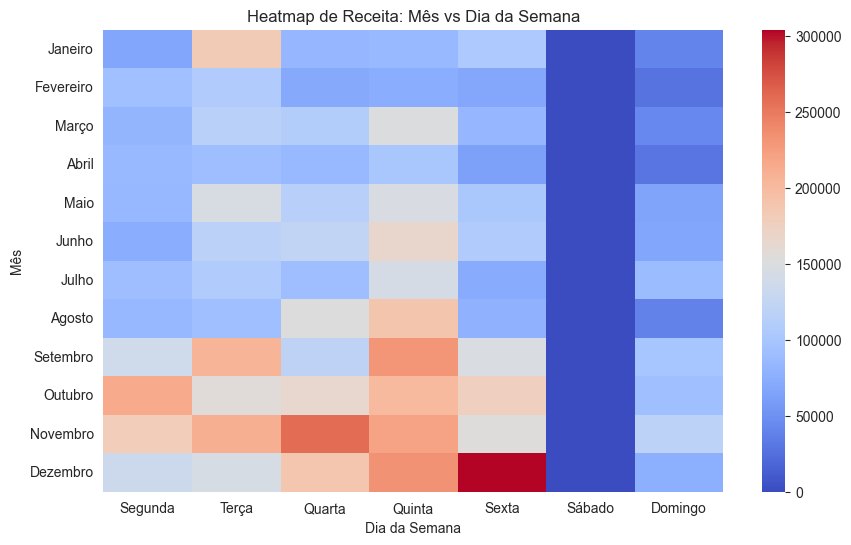

In [50]:
plot_df = (
    df
    .pivot_table(
        index="month_n", # linhas
        columns="week_n", # colunas
        values="revenue", # valores: soma da receita
        aggfunc="sum"
    )
    .sort_index() # ordem crescente
)

# Adiciona coluna do 'Sábado', pois não consta vendas neste dia em todo dataset
plot_df.insert(5,5,0)

# Renomeia linhas
plot_df.index = [
    "Janeiro", "Fevereiro", "Março", "Abril",
    "Maio", "Junho", "Julho", "Agosto",
    "Setembro", "Outubro", "Novembro", "Dezembro"
]

# Renomeia colunas
plot_df.columns = [
    "Segunda", "Terça", "Quarta", "Quinta",
    "Sexta", "Sábado", "Domingo"
]

plt.figure(figsize=(10, 6))
sns.heatmap(
    data=plot_df,
    cmap="coolwarm"
)
plt.title("Heatmap de Receita: Mês vs Dia da Semana")
plt.xlabel("Dia da Semana")
plt.ylabel("Mês")
plt.show()


# Conclusões:

Este estudo pretende ajudar na tomada de decisões sobre quais meses e dias da semanas devem ser considerados com mais importância para a implementação de estratégias que visam aumentar a receita de vendas. Com as análises, percebemos o seguinte:

- Os meses de ***Setembro, Outubro, Novembro e Dezembro*** são os meses foco.
- De ***Segunda a Sexta*** temos maiores números de vendas.